# PyBEL Demo

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt/)

This notebook demonstrates how to download a BEL file by URL, parse with `pybel`, and filter its data using the data structures provided by `networkx` and `pybel`.

In [1]:
import os, logging, time, math, shutil
from collections import Counter

import pybel
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pybel.get_version()

'PyBEL Version: 0.2.5'

In [3]:
time.asctime()

'Wed Nov 16 14:45:22 2016'

## Data Acquisition

In these examples, `pybel` downloads the small and large corpra from the Selventa examples posted on the [BEL Framework](http://resource.belframework.org/belframework/1.0/knowledge). 

### Selventa Small Corpus

The Selventa [Small Corpus](http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel) is distributed by OpenBEL and consists of approximately 2000 hand curated statements drawn from 57 PubMeds.

In [4]:
%%time
small_corpus_url = 'http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel'
g = pybel.from_url(small_corpus_url)

CPU times: user 26.7 s, sys: 2.62 s, total: 29.4 s
Wall time: 31.4 s


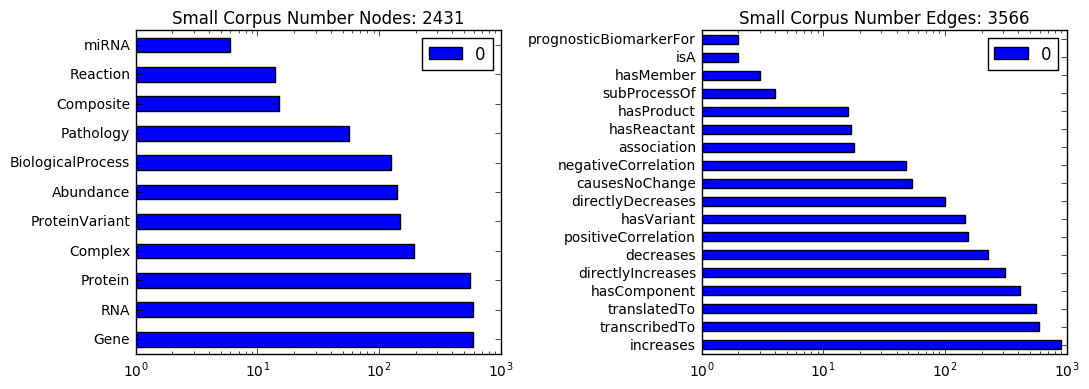

In [5]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g), orient='index')
ec = Counter(data[2]['relation'] for data in g.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Small Corpus Number Nodes: {}'.format(g.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Small Corpus Number Edges: {}'.format(g.number_of_edges()))

plt.tight_layout()
plt.show()

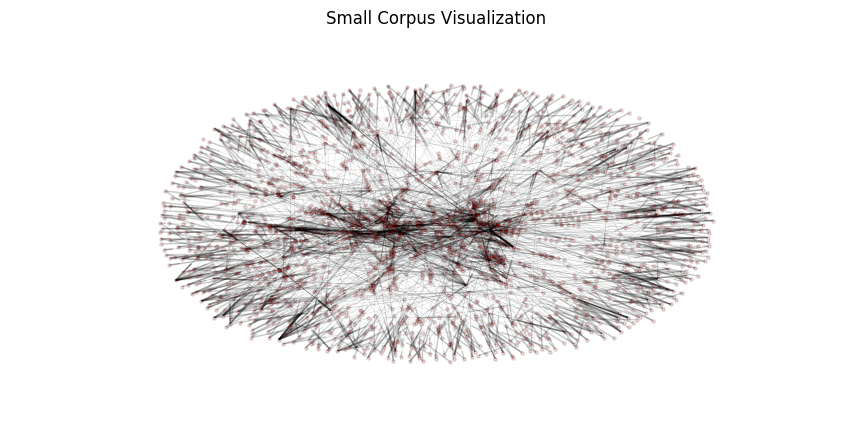

In [6]:
plt.figure(figsize=(10, 5))
plt.title('Small Corpus Visualization')
nx.draw_spring(g, 
               k=4/math.sqrt(len(g)),
               iterations=1000,
               node_size=5, 
               width=0.3,  
               alpha=0.15)

plt.show()

### Selventa Large Corpus

The Selventa [Large Corpus](http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel) is a subset of the Selventa Knowledge Base and containts approximately 61,000 statements. This corpus was used in the publication of the [Reverse Causal Reasoning](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-340) algorithm.

In [7]:
%%time
large_corpus_url = 'http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel'
g_large = pybel.from_url(large_corpus_url)

CPU times: user 6min 28s, sys: 4.09 s, total: 6min 32s
Wall time: 6min 38s


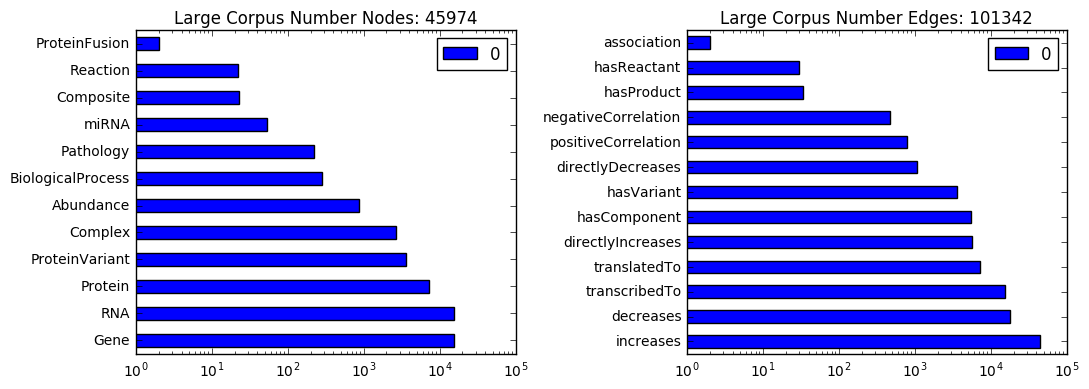

In [8]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g_large), orient='index')
ec = Counter(data[2]['relation'] for data in g_large.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Large Corpus Number Nodes: {}'.format(g_large.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Large Corpus Number Edges: {}'.format(g_large.number_of_edges()))

plt.tight_layout()
plt.show()

## Filtering Data

In addition to all of the wonderful ways one can interact with a `networkx` graph ([see tutorial](http://networkx.readthedocs.io/en/networkx-1.11/tutorial/tutorial.html)), `pybel` exposes the nodes and edges with simple filtering mechanisms. 

### Filtering Nodes by Data

Each node has a data dictionary attached to it. By default, this contains information about what type of entitity it is, what namespace and name it has, and other information.

In [14]:
human_genes = list(g.nodes_iter(type="Gene", namespace='HGNC'))
', '.join('{}:{}'.format(n, v) for f, n, v in human_genes[:10])

'HGNC:RBX1, HGNC:TGFB1, HGNC:TAB1, HGNC:PDE4B, HGNC:RANBP2, HGNC:TCEB2, HGNC:TP53, HGNC:PAWR, HGNC:ACP1, HGNC:MAPKAPK2'

If a sequence (`list`, `tuple`, or `set`) is given as the value, then nodes matching any of the elements of the sequence are returned.

In [13]:
human_and_mouse_genes = list(g.nodes_iter(type="Gene", namespace={'HGNC', 'MGI'}))
', '.join('{}:{}'.format(n, v) for f, n, v in human_and_mouse_genes[:15])

'MGI:Rps6kb2, MGI:Mmp2, HGNC:RBX1, HGNC:TGFB1, HGNC:TAB1, HGNC:PDE4B, MGI:Ctnnb1, HGNC:RANBP2, HGNC:TCEB2, HGNC:TP53, MGI:Map2k2, MGI:Irs1, HGNC:PAWR, HGNC:ACP1, HGNC:MAPKAPK2'

### Filtering Edges by Data

Like the nodes, edges also have data associated to them. This can allow for filtering of edges by relation.

In [11]:
increases_edges = list(g.edges_iter(relation='increases'))

increases_edges[:10]

[(('Abundance', 'CHEBI', 'angiotensin II'),
  ('Abundance', 'CHEBI', 'nitric oxide')),
 (('Abundance', 'CHEBI', 'angiotensin II'),
  ('BiologicalProcess', 'GO', 'apoptotic process')),
 (('Protein', 'MGI', 'Fads2'), ('Pathology', 'MESHD', 'Edema')),
 (('Protein', 'MGI', 'Fads2'), ('Abundance', 'CHEBI', 'arachidonic acid')),
 (('Composite', ('Protein', 'MGI', 'Mef2c'), ('Protein', 'MGI', 'Ppargc1a')),
  ('RNA', 'MGI', 'Mb')),
 (('Abundance', 'SCHEM', 'Ionomycin'), ('Protein', 'PFM', 'Calm Family')),
 (('Abundance', 'SCHEM', 'Ionomycin'), ('Abundance', 'CHEBI', 'calcium(2+)')),
 (('Abundance', 'SCHEM', 'Ionomycin'), ('Abundance', 'CHEBI', 'calcium(2+)')),
 (('Abundance', 'SCHEM', 'Ionomycin'), ('Protein', 'PFH', 'AKT Family')),
 (('Abundance', 'SCHEM', 'Ionomycin'),
  ('ProteinVariant',
   'PFH',
   'AKT Family',
   ('ProteinModification', 'Ph', 'Thr', 308)))]

If a dictionary is given as the argument, then it matches that subdictionary. Here, this allows for filtering edges where the subject's kinase activity is involved.

In [12]:
edge_subject_kinase = list(g.edges_iter(subject={
    'modifier': 'Activity',
    'effect': {'MolecularActivity': 'KinaseActivity'}
}))
                           
edge_subject_kinase[:10]

[(('Pathology', 'MESHD', 'Carcinoma, Non-Small-Cell Lung'),
  ('Protein', 'PFH', 'AKT Family')),
 (('Protein', 'HGNC', 'IKBKB'), ('Complex', 'NCH', 'Nfkb Complex')),
 (('Protein', 'HGNC', 'IKBKB'),
  ('ProteinVariant',
   'HGNC',
   'FOXO3',
   ('ProteinModification', 'Ph', 'Ser', 644))),
 (('Protein', 'HGNC', 'BRAF'), ('Protein', 'HGNC', 'MAP2K2')),
 (('Protein', 'HGNC', 'BRAF'), ('Pathology', 'MESHD', 'Ovarian Neoplasms')),
 (('Protein', 'HGNC', 'BRAF'), ('Pathology', 'MESHD', 'Melanoma')),
 (('Protein', 'HGNC', 'BRAF'), ('Pathology', 'MESHD', 'Thyroid Neoplasms')),
 (('Protein', 'HGNC', 'BRAF'), ('Protein', 'HGNC', 'MAP2K1')),
 (('Protein', 'HGNC', 'BRAF'), ('Pathology', 'MESHD', 'Colorectal Neoplasms')),
 (('Protein', 'HGNC', 'PRKCZ'), ('BiologicalProcess', 'GO', 'glucose import'))]

# Conclusions

`pybel` allows for easy and fast loading of data from a variety of sources. Additionally, the shown method of filtering can become incredibly useful, especially when overlaying other data, such as differential gene expression labels (up, down, unregulated).